Datasets Loaded Successfully!
Train rows: 1460  Test rows: 1459

--- Model Performance ---
Mean Squared Error: 2806426667.247853
R² Score: 0.6341189942328371


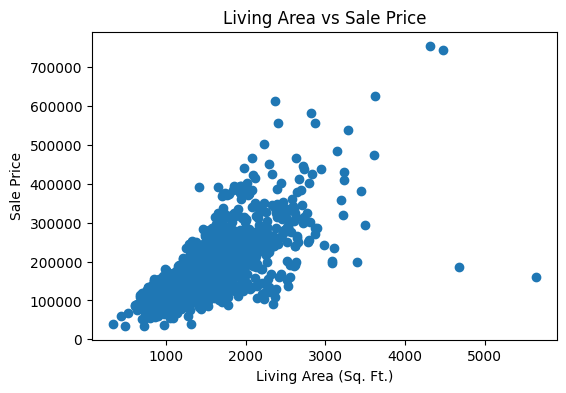

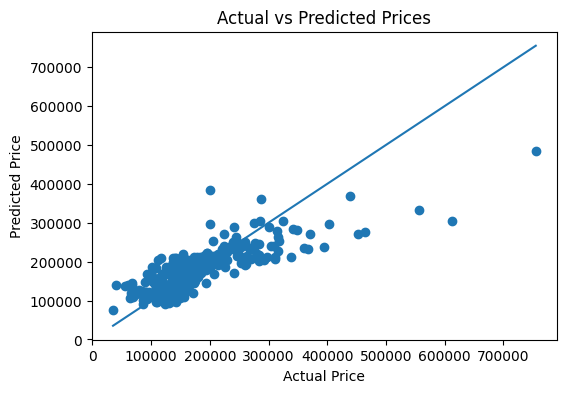


--- Predictions for Test Data ---
[122173.31310421 140561.53868318 201783.75489581 199183.09722051
 192133.73910587 204488.43887813 155804.12719639 184723.4405458
 168465.01972467 120716.94480604]


In [3]:
# ---------------------------------------------------------
# 1. Import Libraries
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------------------
# 2. Load Datasets
# ---------------------------------------------------------
train = pd.read_csv("/content/train.csv")
test  = pd.read_csv("/content/test.csv")

print("Datasets Loaded Successfully!")
print("Train rows:", train.shape[0], " Test rows:", test.shape[0])

# ---------------------------------------------------------
# 3. Clean Missing Values (Silent)
# ---------------------------------------------------------
train = train.fillna(train.mean(numeric_only=True))
test  = test.fillna(test.mean(numeric_only=True))

# ---------------------------------------------------------
# 4. Select Features (Correct Columns)
# ---------------------------------------------------------
features = ["GrLivArea", "BedroomAbvGr", "FullBath"]

X = train[features]
y = train["SalePrice"]

# ---------------------------------------------------------
# 5. Train-Test Split (for model evaluation)
# ---------------------------------------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------------
# 6. Train Model
# ---------------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------------------------------------
# 7. Validate Model
# ---------------------------------------------------------
y_pred = model.predict(X_valid)

print("\n--- Model Performance ---")
print("Mean Squared Error:", mean_squared_error(y_valid, y_pred))
print("R² Score:", r2_score(y_valid, y_pred))

# ---------------------------------------------------------
# 8. Plot Graphs
# ---------------------------------------------------------

# Graph 1: Living Area vs Sale Price
plt.figure(figsize=(6,4))
plt.scatter(train["GrLivArea"], train["SalePrice"])
plt.xlabel("Living Area (Sq. Ft.)")
plt.ylabel("Sale Price")
plt.title("Living Area vs Sale Price")
plt.show()

# Graph 2: Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_valid, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)])
plt.show()

# ---------------------------------------------------------
# 9. Predict on Test Dataset
# ---------------------------------------------------------
test_predictions = model.predict(test[features])

print("\n--- Predictions for Test Data ---")
print(test_predictions[:10])  # showing only first 10 for short output
